In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
cases_df = pd.read_csv('Resources/US_New_Covid_Cases.csv')
total_population_df = pd.read_csv('Resources/Population.csv')
vaccinations_df = pd.read_csv('Resources/Covid19 _Vacinations_by_State.csv')


# cases.head(2)



C:\Users\matt\.conda\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (5,6,8,10,14,16,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
cases_summary_df = cases_df[['State', 'Week no.', 'Total new Covid Cases']]
cases_summary_df.dropna(how='any', inplace=True)
len(cases_summary_df)

C:\Users\matt\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2040

In [11]:
# total_population_df.iloc[:,:].str.replace(',', '').astype(float)
# total_population_df.head(2)
# total_population_df.astype({'2019 Population':'float'})
total_population_df.dtypes

State              object
2019 Population     int64
Code               object
dtype: object

In [13]:
# vaccinations.columns
vaccinations_summary_df = vaccinations_df[['Record Date', 'Week no.', 'State', 'State.1', 'Week no..1', 'Total vac per week']]
# vaccinations_summary_df.head()

vaccinations_per_week_df = vaccinations_summary_df[['State.1', 'Week no..1', 'Total vac per week']]
vaccinations_per_week_df = vaccinations_per_week_df.rename(columns={'State.1':'State', 'Week no..1':'Week no.'})
vaccinations_per_week_df.dropna(how='any', inplace=True)
len(vaccinations_per_week_df)

1672

In [14]:
merge_df = pd.merge(cases_summary_df, vaccinations_per_week_df, how='inner', left_on=['State', 'Week no.'], right_on=['State', 'Week no.'] )
merge_df.head()

merge_value_reset_df = merge_df.replace({'Week no.':{53.0: 0, 52.0: -1.0, 51.0:-2.0, 50.0:-3.0, 49.0:-4.0}})
merge_value_reset_df

,State,Week no.,Total new Covid Cases,Total vac per week
0,AK,29.0,133.0,662.0
1,AK,28.0,588.0,3627.0
2,AK,27.0,304.0,5021.0
3,AK,26.0,230.0,8414.0
4,AK,25.0,239.0,6233.0
...,...,...,...,...
1667,WY,0.0,1745.0,33.0
1668,WY,-1.0,2071.0,3.0
1669,WY,-1.0,2071.0,6.0
1670,WY,-2.0,2370.0,5.0


In [15]:
for i, row in merge_value_reset_df.iterrows():
    old_val = merge_value_reset_df.at[i, 'Week no.']
    merge_value_reset_df.at[i, "Week no."] = old_val + 3

merge_value_reset_df

,State,Week no.,Total new Covid Cases,Total vac per week
0,AK,32.0,133.0,662.0
1,AK,31.0,588.0,3627.0
2,AK,30.0,304.0,5021.0
3,AK,29.0,230.0,8414.0
4,AK,28.0,239.0,6233.0
...,...,...,...,...
1667,WY,3.0,1745.0,33.0
1668,WY,2.0,2071.0,3.0
1669,WY,2.0,2071.0,6.0
1670,WY,1.0,2370.0,5.0


In [16]:
lookup_state = input('Which State? ')
state_df = merge_value_reset_df.loc[(merge_df['State'] == lookup_state)]
state_df.sort_values(by=['Week no.'])

Which State? CA


,State,Week no.,Total new Covid Cases,Total vac per week
159,CA,1.0,271680.0,110.0
158,CA,2.0,279419.0,419.0
157,CA,3.0,261470.0,367.0
156,CA,4.0,287110.0,78445.0
155,CA,5.0,264706.0,183248.0
154,CA,6.0,179199.0,123202.0
153,CA,7.0,128861.0,208842.0
152,CA,8.0,88701.0,264374.0
151,CA,9.0,59763.0,504276.0
150,CA,10.0,38884.0,654633.0


This information is based from 12/13/2020 - 7/22/2021


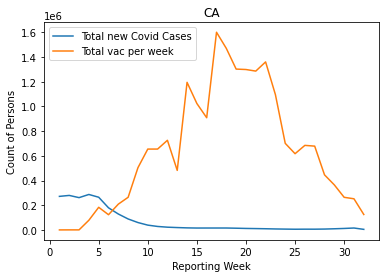

In [17]:
print('This information is based from 12/13/2020 - 7/22/2021')
state_df.plot(x='Week no.', y=['Total new Covid Cases', 'Total vac per week'], xlabel='Reporting Week', ylabel='Count of Persons', kind='line', title=lookup_state)
plt.show()

This information is based from 12/13/2020 - 7/22/2021


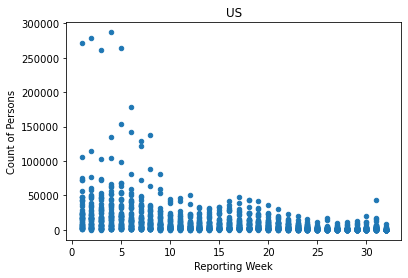

In [18]:
print('This information is based from 12/13/2020 - 7/22/2021')
merge_value_reset_df.plot(x='Week no.', y=['Total new Covid Cases'], xlabel='Reporting Week', ylabel='Count of Persons', kind='scatter', title='US')
plt.show()

This information is based from 12/13/2020 - 7/22/2021


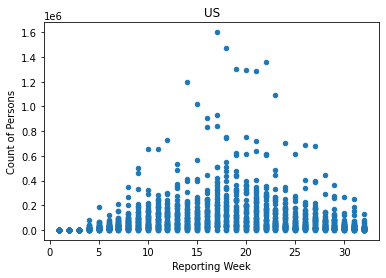

In [19]:
print('This information is based from 12/13/2020 - 7/22/2021')
merge_value_reset_df.plot(x='Week no.', y=['Total vac per week'], xlabel='Reporting Week', ylabel='Count of Persons', kind='scatter', title='US')
plt.show()

In [20]:
population_lookup_state = input('What State?')
week_number = input('Rates up to which week?')

population_df = total_population_df.loc[(total_population_df['Code'] == population_lookup_state)]
pop = population_df['2019 Population'].values[0]

print(pop)

What State?CA
Rates up to which week?5
39512223


In [45]:
pop_state_df = merge_value_reset_df.loc[(merge_df['State'] == lookup_state)] # & (merge_df['Week no.'] < pd.to_numeric(week_number) + 1)]
pop_state_df.sort_values(by=['Week no.'])
pop_state_df2 = pop_state_df.loc[(pop_state_df['Week no.'] <= pd.to_numeric(week_number))]
pop_state_df2['Week no.'].astype(np.int64)
pop_state_df2=pop_state_df2.sort_values(by=['Week no.'], ascending=True)


pop_state_df2['Running Total']=0
pop_state_df2['Running Total'].astype(np.int64)
pop_state_df2['Percentage Vaccinated']=0
pop_state_df2['Percentage Vaccinated'].astype(np.float)
# pop_state_df2.astype({'Percentage Vaccinated':'float'})
total = 0
for i, row in pop_state_df2.iterrows():
    week_val = pop_state_df2.at[i, 'Total vac per week']
    pd.to_numeric(week_val)
    total = total + week_val
    pop_state_df2.at[i, 'Running Total'] = total
    percentage = (total / pop) * 100
    print(percentage)
    pop_state_df2.at[i,'Percentage Vaccinated'] = percentage
pop_state_df2.dtypes

0.0002783948653053512
0.0013388262158775526
0.0022676527210326787
0.2008011546199261
0.6645766298696988


C:\Users\matt\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


State                     object
Week no.                 float64
Total new Covid Cases    float64
Total vac per week       float64
Running Total              int64
Percentage Vaccinated      int64
dtype: object

<AxesSubplot:title={'center':'US'}, xlabel='Reporting Week', ylabel='Percentage Vaccinated'>

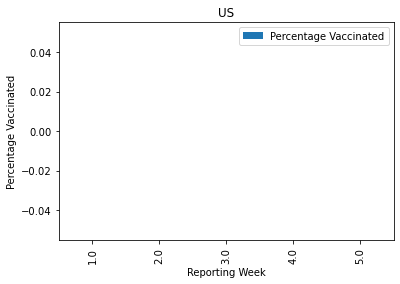

In [42]:
pop_state_df2.plot(x='Week no.', y=['Percentage Vaccinated'], xlabel='Reporting Week', ylabel='Percentage Vaccinated', kind='bar', title='US')